# Introduction to plotting with Matplotlib

[Matplotlib](https://www.matplotlib.org) is a Python package for visualization used extensively scientific computing. It is able to produce publication quality plots.

Matplotlib is the most widely used Python tool for visualization; is free, open-source software.

This notebook is intended to provide you with an introduction to the Matplotlib concepts and commands that we will need for our class; that is a (very small) subset of what Matplotlib can do. You are encouraged to learn more about Matplotlib. Very good tutorial resources to help you with improving your Matplotlib skills can be found on the [Matplotlib website](https://matplotlib.org/stable/tutorials/index.html). Additonally, there exists a [gallery of examples](https://matplotlib.org/stable/gallery/index.html) that ccovers nearly every aspect of Matplotlib.

In [1]:
# As usual, we'll need Numpy
import numpy as np

## Importing matplotlib

The most common way to import the required functionality from the Matplotlib module is as follows:

In [2]:
# load matplotlib
import matplotlib.pyplot as plt

### Jupyter notebooks: Inline plots

When coding in a Jupyter notebook, it is best to have plots appear directly in the notebook as the output from the cell that contains the code for the cell.

This is acomplished by specifying the "cell magic"
```
%matplotlib inline
```
or
```
%matplotlib notebook
```

The second version renders the plots interactive so that you can pan and zoom or read off coordinates from the plot.

<p style="margin-bottom: 15px; padding: 4px 12px; background-color: #ffdddd; border-left: 6px solid #f44336;">
Note that there is no space between <tt>%</tt> and <tt>matplotlib</tt>.
</p>

Outside of a notebook, various *backends* are supported. The choice of will often depend on which GUI toolkit is being used in the intended application. See [https://matplotlib.org/stable/users/explain/figure/backends.html] for details. 

In [3]:
# configure Matplotlib for inline plotting
%matplotlib inline

## Running Example: Frequency Response of a First-order lowpass

The frequency response of a filter indicates how much of a signal of frequency $f$ that is input to a filter appears at the output of that filter.

A simple example of a continuous-time filter is a circuit consisting of a resistor $R$ and a capacitor $C$. The input voltage signal is applied to the series of $R$ and $C$ and the output is the voltage across the capacitor $C$. The product $RC$ is called the time-constant and is often denoted as $\tau$.

While this particular filter will not come up in this class, you will encounter it in both the circuits and the continuous-time signals and systems class. The frequency response of this filter has the form
$$
H(f) = \frac{1}{1 + j2\pi f RC} = \frac{1}{1 + j2\pi f \tau}.
$$

We will use this frequency response in our example plots, therefore, we define a function for computing it for a given value of $\tau$ and (either a scalar or vector) $f$.

In [4]:
def H_LP(f, tau):
    """Compute the frequency response of a lowpass filter
    
    Parameters:
    -----------
    f - frequency; either a scalar or a Numpy vector
    tau - time constant (should be >= 0)

    Returns:
    --------
    complex frequency response; either a scalar or a NumPy vector depending on f
    """

    return 1/(1 + 2j*np.pi * f * tau)

## Line plots

The most common plots are line plots that show how a dependendent variable changes as a function of the independent variable.

In signals processing, the independent variable is usually either time $t$ or, like in this example, frequency $f$.

We will make a sequence of progressively more sophisticated plots of the frequency response above.

<p style="margin-bottom: 15px; padding: 4px 12px; background-color: #e7f3fe; border-left: 6px solid #2196F3;">
It is common to iterate on a plot several times until it is just right!
</p>

### A single line

* To begin, we plot the frequency response if the time constant $\tau$ is 0.2 millisecond ($0.2 \text{ms} = 0.2 \cdot 10^{-3} \text{s}$).

* Specifically, we show the squared magnitude of the frequency response.
  - this quantity conveys the fraction of the signal power that propagates from the input to the output for a given frequency $f$.

* We have made simple plots like this before using the function `plt.plot()`.

In [5]:
# compute H(f) for tau = 1e-3
tau = 0.2e-3
ff = np.linspace(0, 10e3, 1000)  # frequency grid, 0 to 10KHz

HH = H_LP(ff, tau)

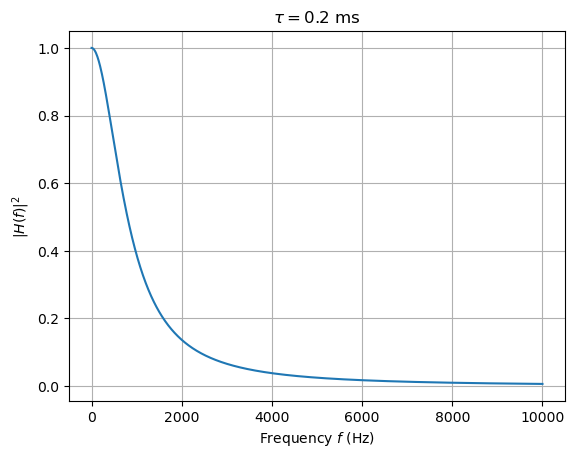

In [6]:
# plot |H(f)|^2
plt.plot(ff, np.abs(HH) ** 2 )

plt.grid()
plt.xlabel('Frequency $f$ (Hz)')
plt.ylabel(r'$|H(f)|^2$')
plt.title(rf'$\tau = {tau*1e3}$ ms')

plt.show()

This is a nice-looking plot; it shows that low frequencies pass as $|H(f)|^2 \approx 1$ for small $f$ and  $|H(f)|^2 \approx 0$ for large $f$.

The plot includes:
* labeled axes
   - note the use of mathematical typesetting on both axes `$|H(f)|$` and `$f$`
   - the label for the frequency axis includes the symbol $f$ for frequency and indicates the units (Hz)
* a tile that indicates the vaue of the parameter $\tau$
   - this also relies on LaTeX for typesetting math
   - the `r` before the string tells Python to accept all characters in the string as-is
   - without the `r`, Python would interpret `\t` as the TAB character 
* a grid to help with reading off values from the plot
* `plt.show()` is not strictly required in a notebook
   - outside a notebook, nothing is drawn until `plt.show()`
   - therefore, it is a good habit to adopt early

### Adding a second line

To see how the parameter $\tau$ impacts the frequency response, let's add a second line to our plot for $\tau$ equal to 20 microsecods ($20 \cdot 10^{-6}$ s). Note that this value is 10 times smaller than the first one.

In [7]:
# compute the second frequency response
tau2 = 20e-6
HH2 = H_LP(ff, tau2)

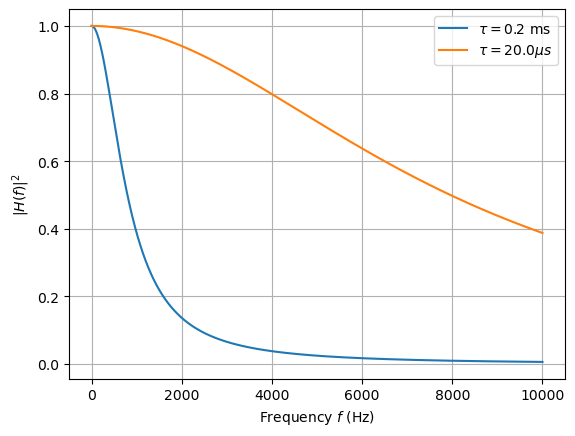

In [8]:
# plot H(f)
plt.plot(ff, np.abs(HH)**2, label=rf'$\tau = {tau*1e3}$ ms' )
plt.plot(ff, np.abs(HH2)**2, label=rf'$\tau = {tau2*1e6} \mu s$')


plt.grid()
plt.xlabel('Frequency $f$ (Hz)')
plt.ylabel(r'$|H(f)|^2$')
plt.legend()

plt.show()

#### Take 2: Extend the frequency axis

There are some good elements in the plot, including
* color coded lines for each frequency response
  - each line is produced by a separate plot command
* a legend that identifies the parameter value for each line
  - note that the labels for the legend are defined by the `label` parameter supplied to each of the `plot` commands
* the title is omitted as the legend provides information about parameter values

However, the plot for the second line is obviously "incomplete". To see more of that plot, we need to extend the frequency axis. Let's extend it all the way to 100 KHz.

And, while we're making a change, let's add a third line with $\tau$ equal to 2 microseconds.

In [9]:
# extend teh frequency axis to 100KHz and add one more frequency response
tau3 = 2e-6
ff = np.linspace(0, 100e3, 1000)  # frequency grid, 0 to 100KHz

HH = H_LP(ff, tau)
HH2 = H_LP(ff, tau2)
HH3 = H_LP(ff, tau3)

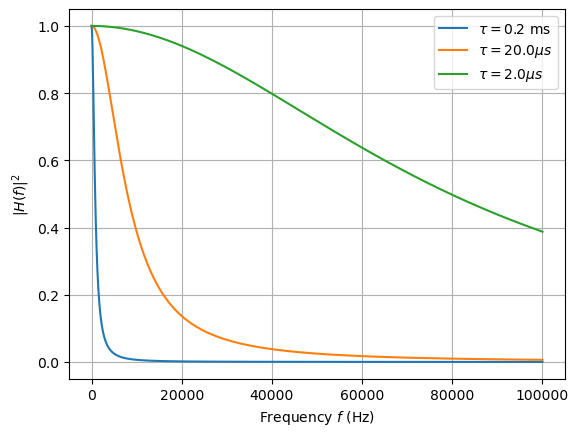

In [10]:
# plot H(f)
plt.plot(ff, np.abs(HH)**2, label=rf'$\tau = {tau*1e3}$ ms' )
plt.plot(ff, np.abs(HH2)**2, label=rf'$\tau = {tau2*1e6} \mu s$')
plt.plot(ff, np.abs(HH3)**2, label=rf'$\tau = {tau3*1e6} \mu s$')


plt.grid()
plt.xlabel('Frequency $f$ (Hz)')
plt.ylabel(r'$|H(f)|^2$')
plt.legend()

plt.show()

#### Take 3: Logarithmic frequency axis

* Adding the third line has re-introduced the problem. The third plot is cut off well before the frequency response approaches 0. This suggests, we need to extend the  frequency axis even further.

* On the other side, the frequency response for $\tau = 0.2$ ms is very compressed at low frequencies. The gradual transition from $|H(f)|^2=1$ appear very sudden. Extending the frequency axis will only make this compression worse.

* The solution to this dilemma is to use a logarithmic scale for the frequency axis frequency. This is easily accomplished by using `semilogx` instead of `plot`.

<p style="margin-bottom: 15px; padding: 4px 12px; background-color: #ffdddd; border-left: 6px solid #f44336;">
With logarithmic scaling all frequency values must be greater than zero! 
</p>

* When changing to logarithmic scaling, we should also change the frequency grid to be logarithmically spaced:
   - this avoids the problem with having 0 as the first grid point
   - it provides evenly spaced grid points along the logarithmically scaled axis
   - `np.logspace()` constructs a logarithmically spaced grid
     - the inputs to `np.logspace` are the logarithms of the grid limits, e.g., `np.logspace(0, 3, 100)` produces 100 points between $10^0=1$ and $10^3=1000$.

In [11]:
# use a logarithmically spaced frequency axis
ff = np.logspace(1, 7, 1000)  # frequency grid, 10 Hz to 10 MHz

HH = H_LP(ff, tau)
HH2 = H_LP(ff, tau2)
HH3 = H_LP(ff, tau3)

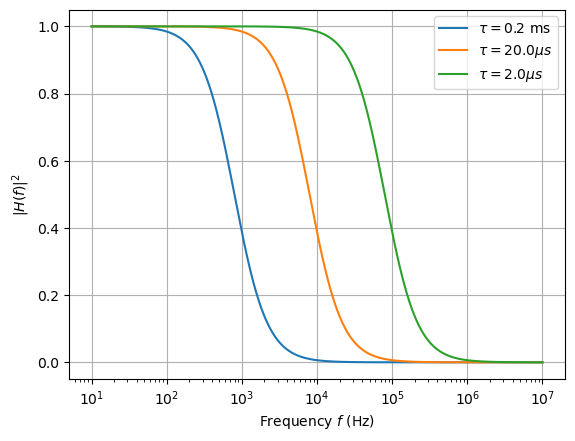

In [12]:
# plot H(f)
plt.semilogx(ff, np.abs(HH)**2, label=rf'$\tau = {tau*1e3}$ ms' )
plt.semilogx(ff, np.abs(HH2)**2, label=rf'$\tau = {tau2*1e6} \mu s$')
plt.semilogx(ff, np.abs(HH3)**2, label=rf'$\tau = {tau3*1e6} \mu s$')


plt.grid()
plt.xlabel('Frequency $f$ (Hz)')
plt.ylabel(r'$|H(f)|^2$')
plt.legend()

plt.show()

#### Take 4: Using deciBels

This is a lot better!

* We see the full range of the function for each of the three frequency responses.
* the similarity of the three function is also readily apparent
  - in particular the parallel transitions from passband (low frequencies) to stopband (high frequencies) are striking

However, there is still a nit to pick. The values of the frequency response in the stop are hard to distinguish. Do they reach 0? Do they cross? That's impossible to tell from this plot.

The solution is (again): use a logarithmic scale. We have two options:
* we can use `loglog` instead of `semilogy` to make both axes logarithmically scaled
* we can convert the frequency response values to a logarithmic scale ourselves
   - this is the preferred option

Let's take a brief detour to discuss the second option.

#### deciBels (dB)

* Functions that vary over several orders of magnitude occur frequently in connection with systems. Frequency responses are a common example.

* To be able to distinguish between the small values these functions take, we use a logarithmic scale.
  - on a logarithmic scale two values are separated by the log of their ratio (and, thus, by the difference of their logs)
  - on a linear scale two values are separated by their difference
     - hence, small values are all cluttered together and hard to distinguish

* Electrical Engineers use a particular logarithmic scale that is called *deciBel* or, short, dB. To convert from linear values for $|H(f)|^2$ to dB, we use the formula
$$
 |H(f)|_{\text{(dB)}} = 10 \cdot \log_{10}(|H(f)|^2) =  20 \cdot \log_{10}(|H(f)|)
$$

* **Examples:** For $|H(f)|$,
  - the value 1 on a linear scale corresponds to 0 dB
  - the value 0.1 on a linear scale corresponds to -20 dB
  - the value 10 on a linear scale corresponds to 20 dB
* To convert from dB to linear, use
$$
  |H(f)|^2 = 10^{|H(f)|_{\text{(dB)}}/10}
$$

Here is a function to convert from linear values of $|H(f)|^2$ to dB is below.

In [13]:
def lin2dB(H):
    """convert linear frequency response values to dB
    
    Parameter:
    ----------
    H - linear frequency response value

    Returns
    -------
    value of H in dB

    Note: this function works for scalars or NumPy vectors
    """
    return 20 * np.log10(H)

With our function for converting to dB, we can now plot the frequency responses as follows:

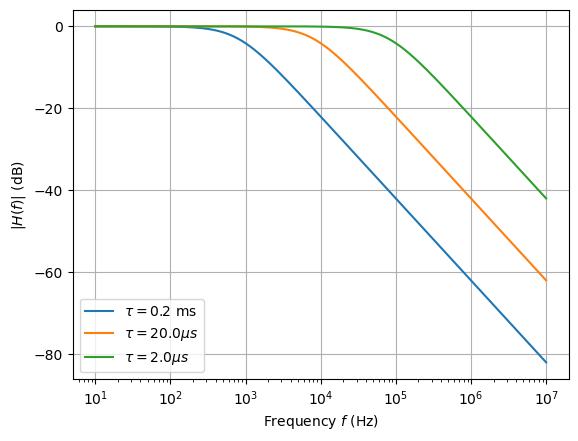

In [14]:
# plot H(f) in dB
plt.semilogx(ff, lin2dB(np.abs(HH)), label=rf'$\tau = {tau*1e3}$ ms' )
plt.semilogx(ff, lin2dB(np.abs(HH2)), label=rf'$\tau = {tau2*1e6} \mu s$')
plt.semilogx(ff, lin2dB(np.abs(HH3)), label=rf'$\tau = {tau3*1e6} \mu s$')


plt.grid()
plt.xlabel('Frequency $f$ (Hz)')
plt.ylabel(r'$|H(f)|$ (dB)')
plt.legend()

plt.show()

#### The final touches

This is a good looking plot!
* The similarity of the three frequency responses is immediately visible.
* The frequency responses never reach zero.
  - they decrease by 20dB whenever frequency increases by a factor of 10 (20dB per decade)
  - a function that decays like $1/x^m$ decreases linearly in a double-logarithmic plot with slope $-m \cdot 20$ dB per decade.

The final touches to our plot are intended to highlight the frequencies that marke the transition from passband to stopband.
* a common choice is to use the frequency when $|H(f)|^2 = \frac{1}{2}$.
  - The level $\frac{1}{2}$ corresponds to -3dB.
  - the frequency where this occurs is called the *cut-off frequency*
* We mark 
  - the -3dB level with a horizontal dotted line (using `plt.axhline()`)
  - the three cutoff frequencies with vertical dashed lines (using `plt.axvline()`)
  - these lines intersect on the respective curves for each frequency response
* An annotation is added that indicates how the cut-off frequency $f_{3dB}$ is determined by the time constant $\tau$
  - using `plt.annotate()`
  - an arrow points from the annotation to the 3dB point of the first curve


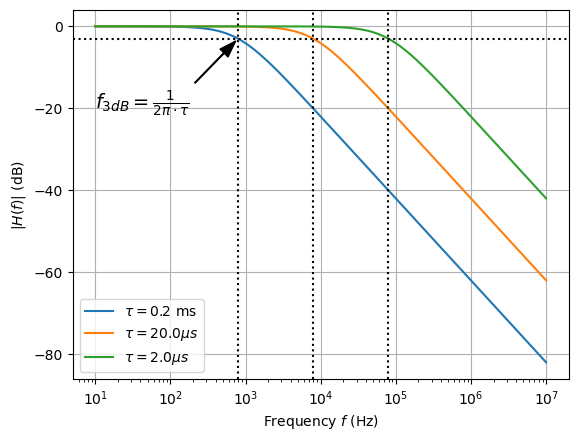

In [15]:
# plot H(f) in dB
plt.semilogx(ff, lin2dB(np.abs(HH)), label=rf'$\tau = {tau*1e3}$ ms' )
plt.semilogx(ff, lin2dB(np.abs(HH2)), label=rf'$\tau = {tau2*1e6} \mu s$')
plt.semilogx(ff, lin2dB(np.abs(HH3)), label=rf'$\tau = {tau3*1e6} \mu s$')

# add lines to indicate the 3dB level and the three cut-off frequencies
plt.axhline(-3, color='black', linestyle=':')
plt.axvline(1/(2*np.pi*tau), color='black', linestyle=':')
plt.axvline(1/(2*np.pi*tau2), color='black', linestyle=':')
plt.axvline(1/(2*np.pi*tau3), color='black', linestyle=':')

# add an annotation that explains the significance of these lines
plt.annotate(r'$f_{3dB} = \frac{1}{2\pi \cdot \tau}$', 
             xy=(1/(2*np.pi * tau), -3), 
             xytext=(10, -20),
             fontsize=14,
             arrowprops=dict(facecolor='black', width=0.5, headwidth=8, shrink=0.05))

plt.grid()
plt.xlabel('Frequency $f$ (Hz)')
plt.ylabel(r'$|H(f)|$ (dB)')
plt.legend()

plt.show()

## Subplots: What about the phase? 

As nice as our plot looks, it is missing an important piece of information: the phases of our frequency responses.

We can put two plots into the same figure using the `plt.subplot()` function.
  - The first three inputs to this function indicate the position of the subplot
    + `nrows` indicates the number of rows of subplots
    + `ncols` indicates the number of columns
    + `index` indicates which of the `nrows * ncols` subplot is to be plotted
  - We want to arrange our two plots one atop the other
    + We use `nrows=2` and `ncols=1` for both subplots
    - `index=1` is the top plot and `index=2` is the second



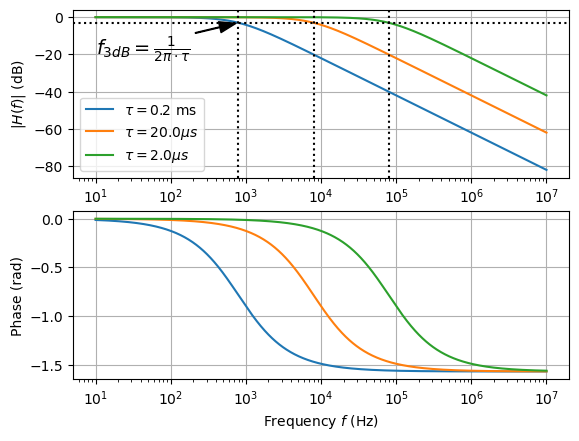

In [16]:
## Top plot
ax_top = plt.subplot(2, 1, 1)

# plot H(f) in dB
plt.semilogx(ff, lin2dB(np.abs(HH)), label=rf'$\tau = {tau*1e3}$ ms' )
plt.semilogx(ff, lin2dB(np.abs(HH2)), label=rf'$\tau = {tau2*1e6} \mu s$')
plt.semilogx(ff, lin2dB(np.abs(HH3)), label=rf'$\tau = {tau3*1e6} \mu s$')

# add lines to indicate the 3dB level and the three cut-off frequencies
plt.axhline(-3, color='black', linestyle=':')
plt.axvline(1/(2*np.pi*tau), color='black', linestyle=':')
plt.axvline(1/(2*np.pi*tau2), color='black', linestyle=':')
plt.axvline(1/(2*np.pi*tau3), color='black', linestyle=':')

# add an annotation that explains the significance of these lines
plt.annotate(r'$f_{3dB} = \frac{1}{2\pi \cdot \tau}$', 
             xy=(1/(2*np.pi * tau), -3), 
             xytext=(10, -20),
             fontsize=14,
             arrowprops=dict(facecolor='black', width=0.5, headwidth=8, shrink=0.05))

plt.grid()
plt.xlabel('Frequency $f$ (Hz)')
plt.ylabel(r'$|H(f)|$ (dB)')
plt.legend()

## bottom plot
ax_bot=plt.subplot(2, 1, 2)
# plot the phase
plt.semilogx(ff, np.angle(HH), label=rf'$\tau = {tau*1e3}$ ms' )
plt.semilogx(ff, np.angle(HH2), label=rf'$\tau = {tau2*1e6} \mu s$')
plt.semilogx(ff, np.angle(HH3), label=rf'$\tau = {tau3*1e6} \mu s$')

plt.grid()
plt.xlabel('Frequency $f$ (Hz)')
plt.ylabel(r'Phase (rad)')



plt.show()

### Some Improvements

That's not a bad start, but there is room for improvement.

* Note that the first `xlabel` is not showing
   - that's actually not bad but lets make that explicit
      + omit the `xlabel` from the top-plot
      + indicate that the two plots share the same x-axis
      + invoke `plt.figure(layout='constrained')`  before any subplots are created to prevent any of the labels to be cut off
* Move the legend to the phase plot 
   - there is more space
   - also move the annotation a little further down
* Change the y-axis ticks of the phase plot to something more easily understood
   - we would prefer to see e.g., $- \frac{\pi}{2}$
* Repeat the vertical lines from the magnitude plot and add a horizontal line at $-\pi/4$

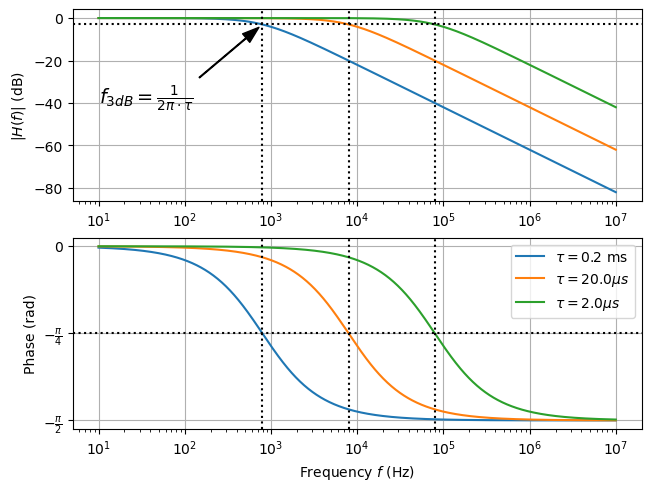

In [17]:
plt.figure(layout="constrained")

## Top plot
ax_top = plt.subplot(2, 1, 1)
# plot H(f) in dB
plt.semilogx(ff, lin2dB(np.abs(HH)), label=rf'$\tau = {tau*1e3}$ ms' )
plt.semilogx(ff, lin2dB(np.abs(HH2)), label=rf'$\tau = {tau2*1e6} \mu s$')
plt.semilogx(ff, lin2dB(np.abs(HH3)), label=rf'$\tau = {tau3*1e6} \mu s$')

# add lines to indicate the 3dB level and the three cut-off frequencies
plt.axhline(-3, color='black', linestyle=':')
plt.axvline(1/(2*np.pi*tau), color='black', linestyle=':')
plt.axvline(1/(2*np.pi*tau2), color='black', linestyle=':')
plt.axvline(1/(2*np.pi*tau3), color='black', linestyle=':')

# add an annotation that explains the significance of these lines
plt.annotate(r'$f_{3dB} = \frac{1}{2\pi \cdot \tau}$', 
             xy=(1/(2*np.pi * tau), -3), 
             xytext=(10, -40),
             fontsize=14,
             arrowprops=dict(facecolor='black', width=0.5, headwidth=8, shrink=0.05))

plt.grid()
plt.ylabel(r'$|H(f)|$ (dB)')

## bottom plot
ax_bot=plt.subplot(2, 1, 2, sharex=ax_top)
# plot the phase; scale phase by pi to make relabeling easier
plt.semilogx(ff, np.angle(HH)/np.pi, label=rf'$\tau = {tau*1e3}$ ms' )
plt.semilogx(ff, np.angle(HH2)/np.pi, label=rf'$\tau = {tau2*1e6} \mu s$')
plt.semilogx(ff, np.angle(HH3)/np.pi, label=rf'$\tau = {tau3*1e6} \mu s$')

# add lines to indicate the -pi/4 level and the three cut-off frequencies
plt.axhline(-0.25, color='black', linestyle=':')
plt.axvline(1/(2*np.pi*tau), color='black', linestyle=':')
plt.axvline(1/(2*np.pi*tau2), color='black', linestyle=':')
plt.axvline(1/(2*np.pi*tau3), color='black', linestyle=':')

# change the y-axis ticks to something more useful
ax_bot.set_yticks([0, -0.25, -0.5], [r'0', r'$-\frac{\pi}{4}$', r'$-\frac{\pi}{2}$'])

plt.grid()
plt.xlabel('Frequency $f$ (Hz)')
plt.ylabel(r'Phase (rad)')
plt.legend()

plt.show()

Voila! That is a plot you might see in a textbook or a research paper. 

There are many more things that can be tweaked, including colors and line-stypes, font styles or sizes, etc. That can all be done, but it will have to be something that you explore on your own.

## Dealing with 3-dimensional data

* It is not uncommon that two dimensions are not sufficient to represent data. In that case a 3-D plot may be needed. 
* This is a big topic; see [gallery of 3-D examples](https://matplotlib.org/stable/gallery/mplot3d/index.html])for inspiration.
* We focus on two cases:
  - a function that maps a single independent variable to two (coupled) dependent variables
    + Example: a complex valued function of time
  - a function that maps two (coupled) independent variable to a  dependent variable
    + Example: a real-valued function of a complex variable
    + Example: in our running example, the magnitude of $H(f; \tau)$ as a function of $f$ and $\tau$.

<p style="margin-bottom: 15px; padding: 4px 12px; background-color: #e7f3fe; border-left: 6px solid #2196F3;">
3-D plots are more difficult to read than two-dimensional plots. Use them sparingly. 
</p>

## Line plots in three dimensions

* A complex exponential signal $x(t) = Ae^{j\phi} \cdot e^{j2\pi ft}$ is a complex-valued function of time.
  - For each instance of time $t$, the signal value is a complex number
* We can depict this signal in three dimensions.
  - the x-axis is used for time $t$
  - the y-axis and the z-axis, are used for real and imaginary parts of $x(t)$, respectively.
* We create a plot with 3 axes, by adding `projection='3d'` to a `plt.sublplot()` command
  - if you only need a single subplot, use: `plt.subplot(1, 1, 1, projection='3d')`

In [18]:
## make a complex exponential signal
fs = 500
dur = 1

f = 3
A = 2
phi = 0

tt = np.arange(0, dur, 1/fs)
xx = A*np.exp(1j*(2*np.pi*f*tt + phi))

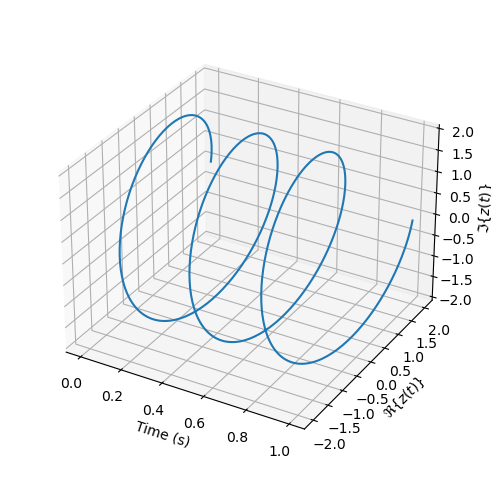

In [19]:
## plot with 3 dimensions
# create a plot with 3 axes
plt.figure(layout='constrained')
ax = plt.subplot(1, 1, 1, projection='3d')
# if your label are cut off, try the following; 
# you may need to tweak zoom value
ax.set_box_aspect(ax.get_box_aspect(), zoom=0.9)

plt.plot(tt, np.real(xx), np.imag(xx))

plt.grid()
plt.xlabel('Time (s)')
plt.ylabel(r'$\Re\{z(t)\}$')
ax.set_zlabel(r'$\Im\{z(t)\}$')

plt.show()

### Brief Detour: Coding Styles

* Matplotlib offers (two styles)[https://matplotlib.org/stable/users/explain/quick_start.html#coding-styles] for creating plots:
  - the *implicit* `pyplot` style that we have been using exclusively to this point
    - all plot commands are preceded by `plt.`
  - the *explicit* object-oriented coding style
    - `Axes` objects are created via `subplot` commands
    - commands are invoked using *methods* provided by the axes-objects
* Most things can be accomplished in either coding style
  - the `implicit` style is a little simpler to use
  - the `explicit` style is more complete 
    + for example, there is no `plt.zlabel()` command to label the z-axis
    + we had to use the object-oriented `ax.set_zlabel()` command
  - when creating complex figures with multiple axes, the *explicit* interface is recommended
* Below, is the same figure created in object-oriented style. 

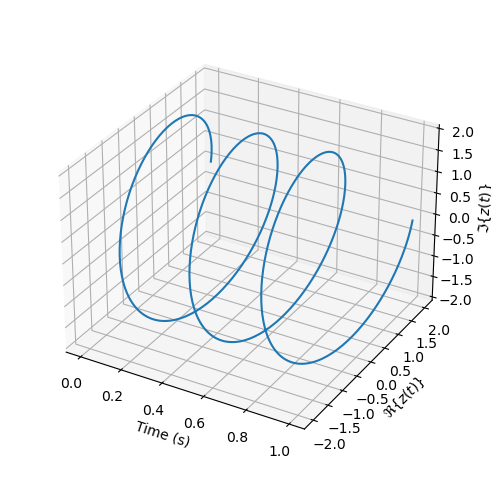

In [20]:
## 3D plot using explicit OO style
fig = plt.figure(layout='constrained')

# create axes-object
ax = fig.add_subplot(projection='3d')
# if your label are cut off, try the following; 
# you may need to tweak zoom value
ax.set_box_aspect(ax.get_box_aspect(), zoom=0.9)


# invoke methods on axes-object
ax.plot(tt, np.real(xx), np.imag(xx))
ax.grid()
ax.set_xlabel('Time (s)')
ax.set_ylabel(r'$\Re\{z(t)\}$')
ax.set_zlabel(r'$\Im\{z(t)\}$')

plt.show()

### Plotting functions of two variables

* A different 3-D plot is obtained when we have two independent variables and one dependent variable
  - For example, a real-valued function of a complex variable
  - In the lab, we will see a plot that includes both time and frequency
* As a running example, we use the following function of a complex variable $z$:
$$
f(z) = \sin(|z|^2)
$$
* We first compute this function
  - the function `X, Y = np.meshgrid(x, y)` is very helpful 
  - it takes vectors `x` and `y` and
  - turns them into matrices of size `len(x)` $\times$ `len(y)`
  - `X` and `Y` repeat the elements of vectors `x` and `y` in such a way that `X` and `Y` can be used for vectorized evaluation of a function

In [21]:
## Compute the function
xx = np.linspace(-2, 2, 101)   # real axis
yy = np.linspace(-2, 2, 101)   # imag axis

X, Y = np.meshgrid(xx, yy)    # create a meshgrid

ff = np.sin(X**2 + Y**2)      # vectorized function evaluation

#### Surface Plot

* We are now ready to plot this function as a 3-D surface.
  - using the function `plot_surface()`
  - this function is only available in the explicit object-oriented style
     + we must use `ax.plot_surface()`
     

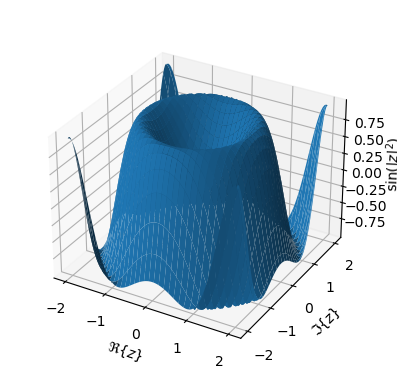

In [22]:
## plot
fig = plt.figure(constrained_layout=False)

ax = fig.add_subplot(projection="3d")
# if your label are cut off, try the following; 
# you may need to tweak zoom value
ax.set_box_aspect(ax.get_box_aspect(), zoom=0.9)

surf = ax.plot_surface(X, Y, ff)
ax.set_xlabel(r'$\Re\{z\}$')
ax.set_ylabel(r'$\Im\{z\}$')
ax.set_zlabel(r'$\sin(|z|^2)$')

plt.show()

#### Using color to improve the plot

* This is a good start, but a couple of improvements are easy to make:
  1. we can add color to reflect the function value
     - this is accomplished using a colormap
     - There are [a lot of built-in colormaps](https://matplotlib.org/stable/users/explain/colors/colormaps.html), including `magma`, `jet`, `inferno`, and `coolwarm`.
  2. A colorbar is added to show how function values map to colors
     - the ticks on the colorbar make explicit how values map to colors

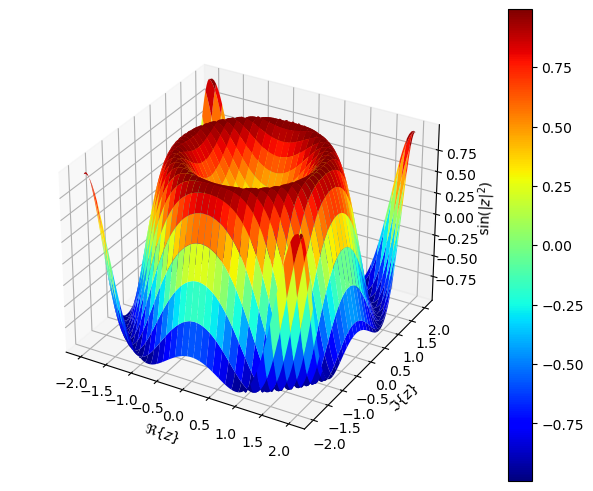

In [24]:
## plot
# import colormaps
from matplotlib import cm

fig = plt.figure(layout='constrained')
ax = fig.add_subplot(projection="3d")
# if your label are cut off, try the following; 
# you may need to tweak zoom value
ax.set_box_aspect(ax.get_box_aspect(), zoom=0.9)

surf = ax.plot_surface(X, Y, ff,
                       cmap=cm.jet)
ax.set_xlabel(r'$\Re\{z\}$')
ax.set_ylabel(r'$\Im\{z\}$')
ax.set_zlabel(r'$\sin(|z|^2)$')

# Add a color bar which maps values to colors; note that the input to this function
# is the surface object returned by `plot_surface`
fig.colorbar(surf) 

plt.show()

#### Drawbacks of 3-D surface plots

* 3-D surface plots look dramatic, but they are not easy to interpret:
  - it is not easy to determine exactly the function value for a given (x, y) coordinate pair
  - parts of the surface tend to be obscured.
    + for example, it is not possible to see how deep the minimum in the center of the surface is
* It is sometimes possible to work around such issues, e.g.,
  - by adding contour lines below the surface
  - by changing the view angle
    + by specifying azimuth, elevation, and roll angle

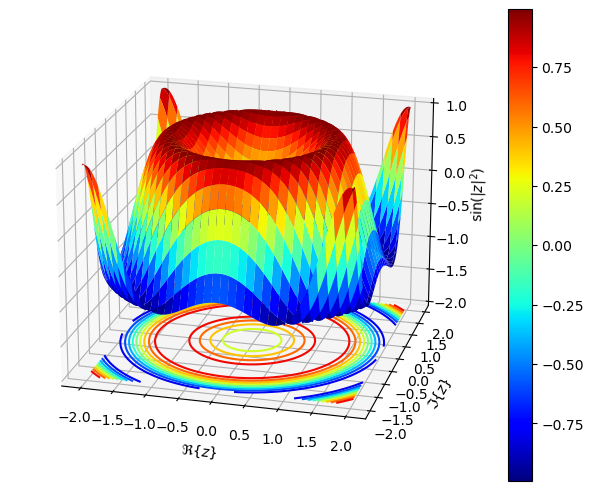

In [25]:
## plot
# import colormaps
from matplotlib import cm

fig = plt.figure(layout='constrained')
ax = fig.add_subplot(projection="3d")

# change the view angle a little (from default values of 30, -60, 0)
ax.view_init(20, -75, 0)

surf = ax.plot_surface(X, Y, ff,
                       cmap=cm.jet)

# add contour lines at level z=-2 below the surface
ax.contour(X, Y, ff, 12,
           offset=-2, cmap=cm.jet)
ax.set_zlim(-2, 1)   # need to change limits of z-axis to accomodate offset


ax.set_xlabel(r'$\Re\{z\}$')
ax.set_ylabel(r'$\Im\{z\}$')
ax.set_zlabel(r'$\sin(|z|^2)$')

# Add a color bar which maps values to colors; note that the input to this function
# is the surface object returned by `plot_surface`
fig.colorbar(surf) 

plt.show()

### Pseudo-color mesh plots

* It is often easier to interpret 3-D plots as a two-dimensional color mesh
  - this plot is equivalent to looking at a color-code surface plot from the top (i.e., along the z-axis)
  - use `ax.pcolormesh()` to generate a pseudo-color mesh plot
* In these plots, the value of the function is encoded only in the color
  - using a colormap
  - clearly, a colorbar is essential for such plots
  - be sure to add a label to the colorbar

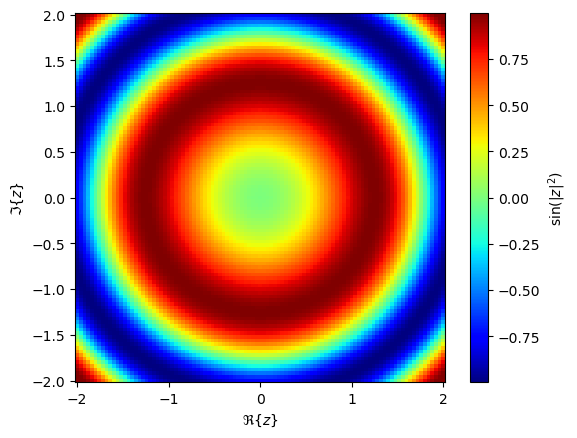

In [26]:
plt.pcolormesh(X, Y, ff, cmap=cm.jet)
plt.axis('square')

plt.xlabel(r'$\Re\{z\}$')
plt.ylabel(r'$\Im\{z\}$')

# add a colorbar with a label
cb = plt.colorbar()
cb.set_label(r'$\sin(|z|^2)$')

plt.show()

* This pseudo-color plot is less dramatic than the 3-D surface plots
* But:
  - it is easy to interpret
     + the function is radially symetric
     + the value in the center at $z=0$ is zero
     + the maximum values are indicated by the dark red ring; 
        - the maximum values are 1
        - they occurs along rings of radius $\sqrt{n\pi / 2}$
     + the minimum occurs on rings of radius $\sqrt{n\pi}$
        - the minimum values are -1

## Summary

* Matplotlib provides extensive and sophisticated tools for visualization
  + we have just barely scratched the surface
* creating good plots takes time and effort
  + the examples provided with the Matplotlib documentation are an invaluable resource
* We discussed two-dimensional line plots in some depth, including
  - multiple lines in the sme plot
  - labels and legends
  - linear and logarithmic axis scaling
  - subplots; multiple plots in the same figure
  - annotations
* For 3-D plots, we considered
  - surface and contour plots
  - using pseudo color via colormaps
  - pseudo-color mesh plots as a 2-D alternative to surface plots